In [1]:
import pandas as pd
from clean_data import clean_data

SOURCE_TYPE = 1

if SOURCE_TYPE == 1:
    test_data_path = 'data/same_season_test_data.csv'
    train_and_validation_data_path = 'data/train_data.csv'
    std_out_threshold, std_dev_threshold = 0.1, 3
    train_and_validation_dataset = clean_data(train_and_validation_data_path, std_out_threshold, std_dev_threshold)
    test_dataset = clean_data(test_data_path, std_out_threshold, std_dev_threshold, delete_rows = False)
    
else:
    test_data_path = 'data/test_data_ver1.csv'
    train_and_validation_data_path = 'data/train_data_ver3.csv'
    train_and_validation_dataset = pd.read_csv(train_and_validation_data_path)
    test_dataset = pd.read_csv(test_data_path)

train_dataset = train_and_validation_dataset.sample(frac=0.85, random_state=42)
validation_dataset = train_and_validation_dataset.drop(train_dataset.index)

In [2]:
train_and_validation_dataset


,is_night_game,home_team_win,home_team_rest,away_team_rest,home_pitcher_rest,away_pitcher_rest,home_batting_batting_avg_10RA,home_batting_onbase_perc_10RA,home_batting_onbase_plus_slugging_10RA,home_batting_leverage_index_avg_10RA,...,away_pitcher_H_batters_faced_skew,away_pitcher_BB_batters_faced_mean,away_pitcher_BB_batters_faced_std,away_pitcher_BB_batters_faced_skew,away_pitcher_leverage_index_avg_mean,away_pitcher_leverage_index_avg_std,away_pitcher_leverage_index_avg_skew,away_pitcher_wpa_def_mean,away_pitcher_wpa_def_std,away_pitcher_wpa_def_skew
0,0,1,1.0,1.000000,15.0,5.0,-1.225891,-1.043317,0.000000,1.274711,...,1.133350,-0.974559,-0.900633,-1.093425,0.896974,-0.611051,-0.398111,0.949021,1.007072,0.340438
1,1,0,2.0,1.155109,9.0,6.0,0.218717,0.595775,0.505906,-0.078454,...,-0.044641,-0.878649,-1.079528,-1.719608,0.050448,-0.851738,-0.202878,0.489511,-0.876286,1.416154
2,1,1,1.0,1.000000,6.0,6.0,0.000000,0.533984,0.775941,-0.354610,...,-0.100180,-1.702937,-0.867762,1.992552,-0.404961,-0.132717,-0.106344,2.481020,-0.200110,-0.026083
3,1,1,1.0,1.000000,5.0,6.0,-0.415669,0.039655,0.030130,0.176990,...,-1.385079,-1.549095,-1.008470,0.116080,-1.236753,-0.119898,0.005985,1.646317,-0.764309,0.000000
4,1,0,1.0,1.000000,6.0,5.0,2.221860,2.140554,1.794125,-1.880372,...,0.356122,0.663967,-0.123547,0.361822,-0.035276,-0.285671,-2.563819,0.527432,-0.911987,-1.109533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11062,1,1,1.0,1.000000,5.0,6.0,0.149762,0.010385,-0.347452,0.625744,...,0.446414,0.498714,-0.016668,-0.360635,0.155712,0.054024,0.000000,1.031686,0.045731,-0.175099
11063,0,0,1.0,1.000000,5.0,5.0,0.625552,0.199011,0.172745,0.929516,...,0.714723,-0.473958,0.793842,1.039308,1.475612,-0.929588,-0.903482,1.208667,2.000674,-1.396761
11064,1,1,1.0,2.000000,5.0,6.0,0.073911,-0.207510,-0.250426,0.694783,...,2.539210,0.307611,-1.203648,0.436108,-0.429071,-0.005314,0.091690,0.673315,-0.254586,-2.032732
11065,1,0,1.0,1.000000,5.0,5.0,-0.143297,-0.031893,0.266264,0.000000,...,0.595529,-0.715971,0.515236,1.147914,-0.038848,-0.328605,0.058396,0.807748,0.000000,1.090447


In [3]:
chosed_features = [
    'home_batting_onbase_plus_slugging_10RA', 'away_batting_onbase_plus_slugging_10RA', 
    'home_team_wins_mean', 'away_team_wins_mean', 
    'home_team_wins_skew', 'away_team_wins_skew',
    'home_batting_onbase_plus_slugging_mean', 'away_batting_onbase_plus_slugging_mean',
    'home_batting_onbase_plus_slugging_skew', 'away_batting_onbase_plus_slugging_skew', 
    'home_pitching_earned_run_avg_mean', 'away_pitching_earned_run_avg_mean', 
    'home_pitching_earned_run_avg_skew', 'away_pitching_earned_run_avg_skew', 
    'home_pitcher_earned_run_avg_10RA', 'away_pitcher_earned_run_avg_10RA',
    'home_batting_wpa_bat_mean', 'away_batting_wpa_bat_mean',
    'home_batting_wpa_bat_skew', 'away_batting_wpa_bat_skew',
    'home_batting_onbase_perc_mean', 'away_batting_onbase_perc_mean',
    'home_batting_onbase_perc_skew', 'away_batting_onbase_perc_skew',
    'home_pitching_H_batters_faced_10RA', 'away_pitching_H_batters_faced_10RA',
]

drop_features = [
    'home_team_rest', 'away_team_rest',
    'home_pitcher_rest','away_pitcher_rest',
    'is_night_game',
]

TYPE_OF_CHOSE = 2
if TYPE_OF_CHOSE == 1:
    train_dataset = train_dataset[chosed_features + ['home_team_win']]
    validation_dataset = validation_dataset[chosed_features + ['home_team_win']]
    test_dataset = test_dataset[chosed_features]
elif TYPE_OF_CHOSE == 2:
    print(train_dataset.columns)
    train_dataset = train_dataset.drop(drop_features, axis=1)
    validation_dataset = validation_dataset.drop(drop_features, axis=1)
    test_dataset = test_dataset.drop(drop_features, axis=1)

Index(['is_night_game', 'home_team_win', 'home_team_rest', 'away_team_rest',
       'home_pitcher_rest', 'away_pitcher_rest',
       'home_batting_batting_avg_10RA', 'home_batting_onbase_perc_10RA',
       'home_batting_onbase_plus_slugging_10RA',
       'home_batting_leverage_index_avg_10RA',
       ...
       'away_pitcher_H_batters_faced_skew',
       'away_pitcher_BB_batters_faced_mean',
       'away_pitcher_BB_batters_faced_std',
       'away_pitcher_BB_batters_faced_skew',
       'away_pitcher_leverage_index_avg_mean',
       'away_pitcher_leverage_index_avg_std',
       'away_pitcher_leverage_index_avg_skew', 'away_pitcher_wpa_def_mean',
       'away_pitcher_wpa_def_std', 'away_pitcher_wpa_def_skew'],
      dtype='object', length=158)


In [4]:
X_train = train_dataset.drop('home_team_win', axis=1)
y_train = train_dataset['home_team_win']
X_validation = validation_dataset.drop('home_team_win', axis=1)
y_validation = validation_dataset['home_team_win']

In [5]:
MODEL_TYPE = 4
"""
1: Logistic Regression
2: Random Forest
3: Gradient Boosting
4: XGBoost
5: LightGBM
6: CatBoost
7: SVR
8: KNN
9: Decision Tree
"""
BLEND_TYPE = 0
"""
0: single model
1: stacking
2: linear blending
3: any blending
4: adaboost
"""

'\n0: single model\n1: stacking\n2: linear blending\n3: any blending\n4: adaboost\n'

In [6]:
from models.logistic_regression import logistic_regression
from models.random_forest import random_forest
from models.gradient_boosting import gradient_boosting
from models.xgboost import xgboost
from models.lightgbm import lightgbm
from models.catboost import catboost
from models.svm import svm
from models.knn import knn
from models.decision_tree import decision_tree
from blending_models.stacking import stacking
from blending_models.linear_blending import linear_blending
from blending_models.any_blending import any_blending
from blending_models.adaboost import adaboost

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 50/50 [00:24<00:00,  2.07trial/s, best loss: -0.5891959798994975]
Validation AUC: 0.5923511516731856


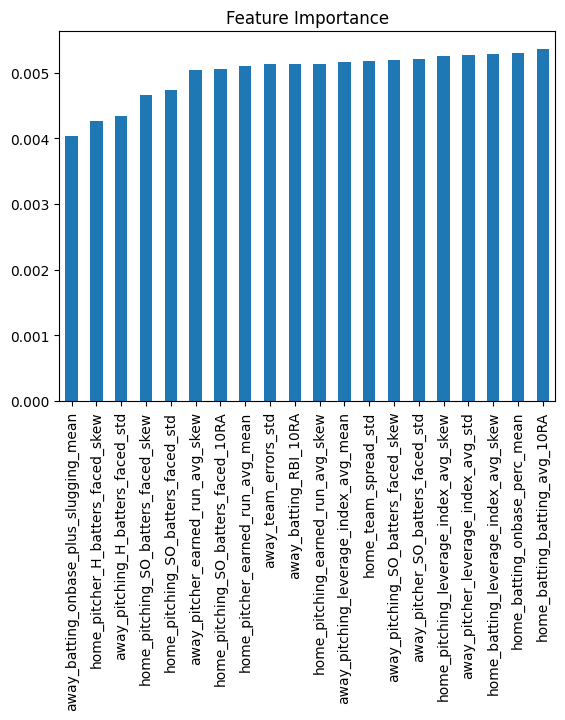

In [7]:
if BLEND_TYPE == 0:
    if MODEL_TYPE == 1:
        accuracy, result = logistic_regression(X_train, y_train, X_validation, y_validation, test_dataset)
        print(f'logistic_regression: {accuracy}')
    elif MODEL_TYPE == 2:
        accuracy, result = random_forest(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 3:
        accuracy, result = gradient_boosting(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 4:
        accuracy, result = xgboost(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 5:
        accuracy, result = lightgbm(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 6:
        accuracy, result = catboost(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 7:
        accuracy, result = svm(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 8:
        accuracy, result = knn(X_train, y_train, X_validation, y_validation, test_dataset)
    elif MODEL_TYPE == 9:
        accuracy, result = decision_tree(X_train, y_train, X_validation, y_validation, test_dataset)

In [8]:
accuracy

0.5923511516731856

In [9]:
prediction = []
for i in result:
    if i > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [11]:


pred = pd.DataFrame({"home_team_win": result})
pred.to_csv("predictions_with_ids.csv", index=True, index_label='id')